In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import pandas as pd
import theano.tensor as tt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Synthetic Data

In [2]:
np.random.seed(42)
X = np.linspace(0, 10, 100)
y_true = 2 * X + 1 + np.random.normal(0,2,size=len(X))
y_observed = y_true + np.random.normal(0,2,len(X))


In [3]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.HalfNormal('sigma', sd=1)

    mu = alpha + beta * X
    y=pm.Normal('y',mu=mu, sd=sigma, observed = y_observed)

In [4]:
with model:
    trace = pm.sample(1000, tune=1000)

e:\Anaconda\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 35 seconds.
e:\Anaconda\envs\pm3bap\lib\site-packages\arviz\utils.py:175: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


C:\Users\ahmad\AppData\Local\Temp\ipykernel_1740\741384726.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
e:\Anaconda\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
e:\Anaconda\envs\pm3bap\lib\site-packages\arviz\utils.py:175: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.

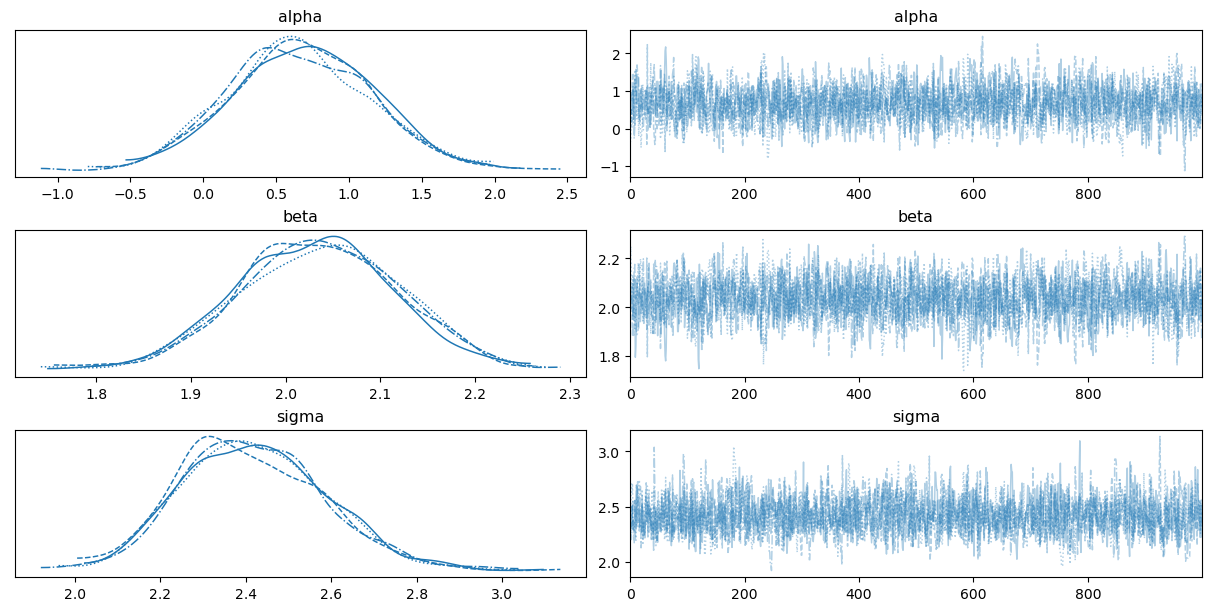

e:\Anaconda\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.67,0.48,-0.25,1.54,0.01,0.01,1764.0,1996.0,1.0
beta,2.03,0.08,1.87,2.18,0.00,0.00,1771.0,1770.0,1.0
sigma,2.42,0.17,2.12,2.73,0.00,0.00,2175.0,1998.0,1.0


In [5]:
pm.traceplot(trace)
plt.show()
pm.summary(trace).round(2)

## Diagnose OverFitting

In [6]:
with model:
    ppc = pm.sample_posterior_predictive(trace, samples=1000)

e:\Anaconda\envs\pm3bap\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


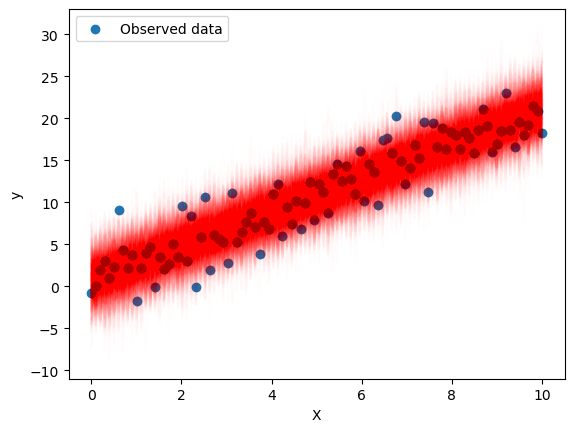

In [7]:
plt.scatter(X, y_observed, label='Observed data')
plt.plot(X,ppc['y'].T,color='red',alpha=0.01)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Regularize the Model

In [8]:
with pm.Model() as regularized_model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Laplace('beta', mu=0, b=1)
    sigma = pm.HalfNormal('sigma', sd=1)

    mu = alpha + beta * X
    y = pm.Normal('y',mu=mu,sd=sigma,observed=y_observed)

    regularized_trace = pm.sample(1000,tune=1000)


e:\Anaconda\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.
The acceptance probability does not match the target. It is 0.8834207717278759, but should be close to 0.8. Try to increase the number of tuning steps.


C:\Users\ahmad\AppData\Local\Temp\ipykernel_1740\1017451986.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(regularized_trace)
e:\Anaconda\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


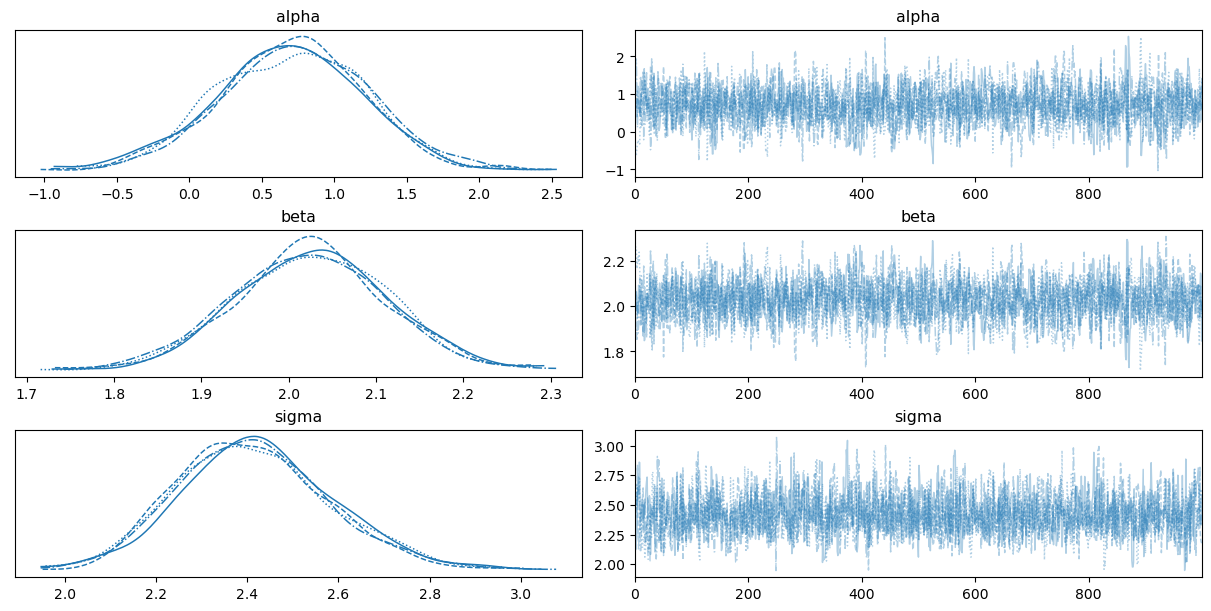

e:\Anaconda\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.70,0.50,-0.32,1.58,0.01,0.01,1782.0,1276.0,1.0
beta,2.03,0.09,1.87,2.19,0.00,0.00,1747.0,1538.0,1.0
sigma,2.42,0.17,2.13,2.75,0.00,0.00,2046.0,2055.0,1.0


In [9]:
pm.traceplot(regularized_trace)
plt.show()
pm.summary(regularized_trace).round(2)

## Compare the two Models

In [10]:
print(type(trace))
print(type(regularized_trace))

print(len(trace))
print(len(regularized_trace))

<class 'pymc3.backends.base.MultiTrace'>
<class 'pymc3.backends.base.MultiTrace'>
1000
1000


In [11]:
model_dict = {'model': trace, 'regularized_model': regularized_trace}
comparison = pm.compare(model_dict)

e:\Anaconda\envs\pm3bap\lib\site-packages\arviz\stats\stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(
e:\Anaconda\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
e:\Anaconda\envs\pm3bap\lib\site-packages\arviz\stats\stats.py:781: UserWarning: rename 'sample' to 'sample' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  log_weights = log_weights.rename("log_weights").rename(sample="sample")
e:\Anaconda\envs\pm3bap\lib\site-packages\arviz\stats\stats.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a f

InvalidIndexError: You can only assign a scalar value not a <class 'tuple'>